In [1]:
import os
os.environ['TF_USE_LEGACY_KERAS'] = 'True'


import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import sys

main_dir = "C:/Users/Aruay/Desktop/ra application/project/"

data = pd.read_csv(main_dir+'dataset/featureNormal_Ek.csv')

#data = pd.read_csv('../ravdes/featureEmodb_Ek.csv')

c:\Users\Aruay\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data

,0,1,2,3,4,5,6,7,8,9,...,186,187,188,189,190,191,192,0.1,0.2,speaker
0,-673.301697,69.508095,-3.494582,18.998575,5.041687,4.626438,-7.605268,-0.057042,-16.231766,-0.299419,...,31.995356,-0.051473,0.025316,-0.044013,-0.079353,0.022513,0.010037,1,1,1
1,-663.297852,67.747589,-6.961255,22.244839,5.313937,2.970508,-6.046401,-3.327282,-17.383774,0.806942,...,31.223174,-0.079423,0.034342,-0.070702,-0.074578,0.025509,-0.001626,1,1,1
2,-664.776184,70.703842,-4.903909,18.797665,1.573513,4.084437,-6.752044,-3.895945,-15.839313,-2.361090,...,31.753796,-0.024101,-0.010724,-0.007700,0.022802,-0.000364,0.032532,1,1,1
3,-660.674133,69.261803,-1.020717,19.743364,3.635317,6.417199,-5.448439,-4.090719,-15.130262,-1.551855,...,30.522612,-0.065819,0.008619,0.004848,-0.030447,-0.000754,0.014753,1,1,1
4,-699.495178,76.727394,-1.602398,21.554548,4.587931,6.054961,-8.122147,-1.003357,-15.158166,-2.688365,...,31.293542,-0.070505,0.011104,0.031151,-0.115693,0.024391,0.003346,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,-558.443298,34.201637,-25.876736,3.420890,-22.962826,-6.289969,-22.845768,-13.475706,-11.609130,-4.602691,...,31.661293,-0.020466,0.014107,0.020899,0.050697,-0.005623,0.022015,0,8,24
1436,-509.914642,49.378990,-22.979485,-0.832579,-23.050257,-10.238819,-17.452888,-8.696088,-14.158811,0.367432,...,31.846921,-0.040751,0.017479,0.014917,0.015533,0.016873,-0.000375,0,8,24
1437,-517.733276,40.459633,-27.217442,2.902560,-22.611633,-14.189220,-19.589163,-8.899709,-12.807209,3.745601,...,31.628901,-0.032364,0.032572,-0.050994,0.009171,0.007204,0.013219,0,8,24
1438,-463.998352,35.496925,-14.260783,9.399699,-19.878208,0.799514,-18.052525,-4.351163,-7.299998,0.214021,...,31.137002,-0.045889,0.027680,-0.042989,-0.060098,0.005997,-0.009220,0,8,24


In [3]:
import joblib

# Load the saved scaler
scaler = joblib.load(main_dir + "scaler.pkl")

# Load the saved model
gender_model = tf.keras.models.load_model(main_dir + "gender_classification_model.h5")

In [4]:
# Keep only the first 193 columns
X_gender = data.iloc[:, :193].values

# Standardize features
X_scaled = scaler.transform(X_gender)

# Predict genders
gender_predictions = gender_model.predict(X_scaled)

45/45 [==============================] - 0s 1ms/step


In [5]:
print(gender_predictions)

[[4.6396576e-04]
 [3.7104925e-04]
 [6.6962000e-04]
 ...
 [9.9882686e-01]
 [9.9909323e-01]
 [9.9771148e-01]]


In [6]:
male_rows = gender_predictions.flatten() < 0.5  # 0 for Male, 1 for Female

df = data[male_rows]

print(f"Filtered dataset contains {df.shape[0]} male samples.")

Filtered dataset contains 721 male samples.


In [7]:
df.shape

(721, 196)

In [8]:
df

,0,1,2,3,4,5,6,7,8,9,...,186,187,188,189,190,191,192,0.1,0.2,speaker
0,-673.301697,69.508095,-3.494582,18.998575,5.041687,4.626438,-7.605268,-0.057042,-16.231766,-0.299419,...,31.995356,-0.051473,0.025316,-0.044013,-0.079353,0.022513,0.010037,1,1,1
1,-663.297852,67.747589,-6.961255,22.244839,5.313937,2.970508,-6.046401,-3.327282,-17.383774,0.806942,...,31.223174,-0.079423,0.034342,-0.070702,-0.074578,0.025509,-0.001626,1,1,1
2,-664.776184,70.703842,-4.903909,18.797665,1.573513,4.084437,-6.752044,-3.895945,-15.839313,-2.361090,...,31.753796,-0.024101,-0.010724,-0.007700,0.022802,-0.000364,0.032532,1,1,1
3,-660.674133,69.261803,-1.020717,19.743364,3.635317,6.417199,-5.448439,-4.090719,-15.130262,-1.551855,...,30.522612,-0.065819,0.008619,0.004848,-0.030447,-0.000754,0.014753,1,1,1
4,-699.495178,76.727394,-1.602398,21.554548,4.587931,6.054961,-8.122147,-1.003357,-15.158166,-2.688365,...,31.293542,-0.070505,0.011104,0.031151,-0.115693,0.024391,0.003346,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,-518.176025,54.336693,-16.867956,2.470917,-4.073838,-2.748888,-13.374091,-6.024971,-16.421869,-2.043707,...,31.550327,-0.011495,0.014177,-0.008497,-0.027965,-0.001463,0.007953,1,8,23
1376,-502.163391,49.330410,-16.674372,6.953362,-1.735307,-1.708595,-17.710266,-5.345790,-14.760635,-1.683560,...,31.989208,-0.043424,0.013255,-0.030656,0.050061,0.003688,0.007049,1,8,23
1377,-499.994263,50.926987,-19.440176,3.803090,-7.180909,-2.145453,-16.375141,-6.704348,-15.546900,-1.911119,...,32.237853,-0.059843,0.048440,-0.045319,0.020689,0.010588,0.016066,1,8,23
1378,-481.682251,41.021809,-19.435980,-0.163736,-10.369910,-2.922106,-15.791293,-7.187538,-15.690004,-3.325412,...,31.312768,-0.032609,0.030134,-0.100309,0.004273,-0.013313,-0.004990,1,8,23


In [9]:
data.iloc[:,-3] == 0

0       False
1       False
2       False
3       False
4       False
        ...  
1435     True
1436     True
1437     True
1438     True
1439     True
Name: 0.1, Length: 1440, dtype: bool

In [10]:
X_speaker = df.iloc[:, -1].copy()
X = df.iloc[:, :-3].copy()
y = df.iloc[:,-2].copy()

In [11]:
X

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
0,-673.301697,69.508095,-3.494582,18.998575,5.041687,4.626438,-7.605268,-0.057042,-16.231766,-0.299419,...,14.502933,15.547618,17.645388,31.995356,-0.051473,0.025316,-0.044013,-0.079353,0.022513,0.010037
1,-663.297852,67.747589,-6.961255,22.244839,5.313937,2.970508,-6.046401,-3.327282,-17.383774,0.806942,...,15.213718,15.513745,17.582760,31.223174,-0.079423,0.034342,-0.070702,-0.074578,0.025509,-0.001626
2,-664.776184,70.703842,-4.903909,18.797665,1.573513,4.084437,-6.752044,-3.895945,-15.839313,-2.361090,...,14.972030,15.697508,17.437520,31.753796,-0.024101,-0.010724,-0.007700,0.022802,-0.000364,0.032532
3,-660.674133,69.261803,-1.020717,19.743364,3.635317,6.417199,-5.448439,-4.090719,-15.130262,-1.551855,...,15.242136,15.597314,16.492804,30.522612,-0.065819,0.008619,0.004848,-0.030447,-0.000754,0.014753
4,-699.495178,76.727394,-1.602398,21.554548,4.587931,6.054961,-8.122147,-1.003357,-15.158166,-2.688365,...,14.636722,16.023571,17.020093,31.293542,-0.070505,0.011104,0.031151,-0.115693,0.024391,0.003346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,-518.176025,54.336693,-16.867956,2.470917,-4.073838,-2.748888,-13.374091,-6.024971,-16.421869,-2.043707,...,15.563899,16.786573,17.289161,31.550327,-0.011495,0.014177,-0.008497,-0.027965,-0.001463,0.007953
1376,-502.163391,49.330410,-16.674372,6.953362,-1.735307,-1.708595,-17.710266,-5.345790,-14.760635,-1.683560,...,15.518351,17.003934,17.874535,31.989208,-0.043424,0.013255,-0.030656,0.050061,0.003688,0.007049
1377,-499.994263,50.926987,-19.440176,3.803090,-7.180909,-2.145453,-16.375141,-6.704348,-15.546900,-1.911119,...,15.092518,16.634495,17.128656,32.237853,-0.059843,0.048440,-0.045319,0.020689,0.010588,0.016066
1378,-481.682251,41.021809,-19.435980,-0.163736,-10.369910,-2.922106,-15.791293,-7.187538,-15.690004,-3.325412,...,15.157907,16.104991,16.717183,31.312768,-0.032609,0.030134,-0.100309,0.004273,-0.013313,-0.004990


In [12]:
y

0       1
1       1
2       1
3       1
4       2
       ..
1375    8
1376    8
1377    8
1378    8
1379    8
Name: 0.2, Length: 721, dtype: int64

In [13]:
X_speaker

0        1
1        1
2        1
3        1
4        1
        ..
1375    23
1376    23
1377    23
1378    23
1379    23
Name: speaker, Length: 721, dtype: int64

In [14]:
X.shape, y.shape

((721, 193), (721,))

In [15]:
from sklearn.utils import shuffle

X, y, X_speaker = shuffle(X, y, X_speaker, random_state=42)

In [16]:
X

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
499,-482.974274,70.752449,-14.093030,9.697247,8.340586,-2.415761,-13.762921,-9.408842,-19.945734,-0.127247,...,17.485952,18.488245,19.794136,34.226379,-0.043134,0.004929,-0.039529,0.028577,-0.006135,-0.014405
1258,-505.370483,60.309914,-11.872391,15.239452,1.397219,-3.400879,-10.103456,-6.025311,-22.578321,6.735066,...,16.375541,17.721583,19.758562,33.453020,-0.058449,0.016617,-0.015209,-0.054548,0.036760,-0.013274
137,-384.119720,50.938568,-22.123240,4.146013,-19.172886,3.697884,-21.725321,-8.857994,-14.722384,-12.292577,...,19.481629,20.033707,19.316535,33.765026,-0.012231,-0.015602,0.022810,-0.006162,0.004981,0.006095
125,-600.489502,78.380417,-6.472833,19.091818,-0.676545,3.290978,-20.534195,-0.131051,-7.557294,-2.300955,...,15.341109,16.728404,16.681996,28.813594,0.001282,-0.073418,0.022524,-0.090229,0.006722,0.003516
141,-630.191711,91.894470,-4.916049,18.276245,2.596644,5.320418,-17.297182,-0.203124,-6.942215,-2.440089,...,14.307762,16.487905,16.276550,30.053426,-0.014668,0.017620,-0.009397,-0.068923,-0.003416,0.006649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,-503.989868,68.907585,-9.939764,14.944476,-2.818100,6.875752,-26.140736,1.054880,-5.804341,-4.376976,...,16.759984,18.640375,19.054267,32.058884,0.026932,-0.021074,0.026702,-0.029949,0.021343,-0.001228
166,-573.106812,56.762455,-2.930424,20.731886,-2.298028,4.026749,-19.395811,1.150211,-10.176166,0.917685,...,14.974672,16.329427,16.116918,31.336124,-0.024688,-0.019084,-0.034166,-0.040140,0.013771,-0.000854
510,-563.606079,70.182686,-14.853501,19.245783,15.801292,1.466610,-5.570126,-3.481671,-16.712420,2.720659,...,16.961951,17.358991,18.009310,33.101683,-0.018980,0.012866,0.003344,-0.025613,0.006480,-0.005541
855,-573.245605,80.446121,-12.591578,18.710548,11.635873,1.314883,-6.154487,3.073936,-10.015546,1.910821,...,15.516219,16.650834,17.991156,31.533914,-0.018724,0.019571,-0.084000,-0.056433,0.011422,-0.012925


In [17]:
X_speaker

499      9
1258    21
137      3
125      3
141      3
        ..
131      3
166      3
510      9
855     15
162      3
Name: speaker, Length: 721, dtype: int64

In [18]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y1 = to_categorical(lb.fit_transform(y))

In [19]:
y1

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [20]:
X.shape, y1.shape

((721, 193), (721, 8))

In [21]:
X2_speaker = X_speaker.copy().to_numpy()
X2=X.copy().to_numpy()
y2=y.copy().to_numpy()

In [22]:
X2.shape, X2_speaker.shape, y2.shape

((721, 193), (721,), (721,))

In [23]:
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Activation
from keras.layers import LSTM

from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout#, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from keras.layers import BatchNormalization

def model1(input_shape1):
    model = Sequential()

    model.add(Conv1D(256, 5,padding='same',
                     input_shape=(input_shape1,1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))


    model.add(Conv1D(256, 5,padding='same'))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))

    model.add(BatchNormalization())

    model.add(MaxPooling1D(pool_size=(8)))
    model.add(Conv1D(256, 5,padding='same',))

    model.add(Activation('relu'))

    model.add(Conv1D(128, 5,padding='same',))
    model.add(Activation('relu'))
    model.add(Conv1D(128, 5,padding='same',))
    model.add(BatchNormalization())

    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    #model.add(Conv1D(128, 5,padding='same',))
    #model.add(Activation('relu'))

    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('softmax'))

    #model.summary()
    return model

In [24]:
import random, numpy as np
from keras import optimizers
kfold=5
def create_index(kfold, size):
    a = []
    for i in range(size):
        a.append(i)
    random.shuffle(a)
    arr = np.array(a)
    return arr.reshape(kfold, size//kfold)

In [25]:
X3=pd.DataFrame(X2)
X3

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
0,-482.974274,70.752449,-14.093030,9.697247,8.340586,-2.415761,-13.762921,-9.408842,-19.945734,-0.127247,...,17.485952,18.488245,19.794136,34.226379,-0.043134,0.004929,-0.039529,0.028577,-0.006135,-0.014405
1,-505.370483,60.309914,-11.872391,15.239452,1.397219,-3.400879,-10.103456,-6.025311,-22.578321,6.735066,...,16.375541,17.721583,19.758562,33.453020,-0.058449,0.016617,-0.015209,-0.054548,0.036760,-0.013274
2,-384.119720,50.938568,-22.123240,4.146013,-19.172886,3.697884,-21.725321,-8.857994,-14.722384,-12.292577,...,19.481629,20.033707,19.316535,33.765026,-0.012231,-0.015602,0.022810,-0.006162,0.004981,0.006095
3,-600.489502,78.380417,-6.472833,19.091818,-0.676545,3.290978,-20.534195,-0.131051,-7.557294,-2.300955,...,15.341109,16.728404,16.681996,28.813594,0.001282,-0.073418,0.022524,-0.090229,0.006722,0.003516
4,-630.191711,91.894470,-4.916049,18.276245,2.596644,5.320418,-17.297182,-0.203124,-6.942215,-2.440089,...,14.307762,16.487905,16.276550,30.053426,-0.014668,0.017620,-0.009397,-0.068923,-0.003416,0.006649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,-503.989868,68.907585,-9.939764,14.944476,-2.818100,6.875752,-26.140736,1.054880,-5.804341,-4.376976,...,16.759984,18.640375,19.054267,32.058884,0.026932,-0.021074,0.026702,-0.029949,0.021343,-0.001228
717,-573.106812,56.762455,-2.930424,20.731886,-2.298028,4.026749,-19.395811,1.150211,-10.176166,0.917685,...,14.974672,16.329427,16.116918,31.336124,-0.024688,-0.019084,-0.034166,-0.040140,0.013771,-0.000854
718,-563.606079,70.182686,-14.853501,19.245783,15.801292,1.466610,-5.570126,-3.481671,-16.712420,2.720659,...,16.961951,17.358991,18.009310,33.101683,-0.018980,0.012866,0.003344,-0.025613,0.006480,-0.005541
719,-573.245605,80.446121,-12.591578,18.710548,11.635873,1.314883,-6.154487,3.073936,-10.015546,1.910821,...,15.516219,16.650834,17.991156,31.533914,-0.018724,0.019571,-0.084000,-0.056433,0.011422,-0.012925


In [26]:
X3_speaker = pd.DataFrame(X2_speaker)
X3_speaker

,0
0,9
1,21
2,3
3,3
4,3
...,...
716,3
717,3
718,9
719,15


In [27]:
speakers = X_speaker.unique()
speakers

array([ 9, 21,  3,  7, 11, 17, 13, 15,  1, 23,  5, 19, 22], dtype=int64)

In [28]:
X3_col = X3_speaker.rename(columns={0: 'speaker'})
X3_col

,speaker
0,9
1,21
2,3
3,3
4,3
...,...
716,3
717,3
718,9
719,15


In [29]:
X_combined = pd.concat([X3, X3_col], axis=1)
X_combined

,0,1,2,3,4,5,6,7,8,9,...,184,185,186,187,188,189,190,191,192,speaker
0,-482.974274,70.752449,-14.093030,9.697247,8.340586,-2.415761,-13.762921,-9.408842,-19.945734,-0.127247,...,18.488245,19.794136,34.226379,-0.043134,0.004929,-0.039529,0.028577,-0.006135,-0.014405,9
1,-505.370483,60.309914,-11.872391,15.239452,1.397219,-3.400879,-10.103456,-6.025311,-22.578321,6.735066,...,17.721583,19.758562,33.453020,-0.058449,0.016617,-0.015209,-0.054548,0.036760,-0.013274,21
2,-384.119720,50.938568,-22.123240,4.146013,-19.172886,3.697884,-21.725321,-8.857994,-14.722384,-12.292577,...,20.033707,19.316535,33.765026,-0.012231,-0.015602,0.022810,-0.006162,0.004981,0.006095,3
3,-600.489502,78.380417,-6.472833,19.091818,-0.676545,3.290978,-20.534195,-0.131051,-7.557294,-2.300955,...,16.728404,16.681996,28.813594,0.001282,-0.073418,0.022524,-0.090229,0.006722,0.003516,3
4,-630.191711,91.894470,-4.916049,18.276245,2.596644,5.320418,-17.297182,-0.203124,-6.942215,-2.440089,...,16.487905,16.276550,30.053426,-0.014668,0.017620,-0.009397,-0.068923,-0.003416,0.006649,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,-503.989868,68.907585,-9.939764,14.944476,-2.818100,6.875752,-26.140736,1.054880,-5.804341,-4.376976,...,18.640375,19.054267,32.058884,0.026932,-0.021074,0.026702,-0.029949,0.021343,-0.001228,3
717,-573.106812,56.762455,-2.930424,20.731886,-2.298028,4.026749,-19.395811,1.150211,-10.176166,0.917685,...,16.329427,16.116918,31.336124,-0.024688,-0.019084,-0.034166,-0.040140,0.013771,-0.000854,3
718,-563.606079,70.182686,-14.853501,19.245783,15.801292,1.466610,-5.570126,-3.481671,-16.712420,2.720659,...,17.358991,18.009310,33.101683,-0.018980,0.012866,0.003344,-0.025613,0.006480,-0.005541,9
719,-573.245605,80.446121,-12.591578,18.710548,11.635873,1.314883,-6.154487,3.073936,-10.015546,1.910821,...,16.650834,17.991156,31.533914,-0.018724,0.019571,-0.084000,-0.056433,0.011422,-0.012925,15


In [35]:
# Get random 5 speakers

speaker_counts = X_combined['speaker'].value_counts()
total_speakers = speaker_counts.head(12).index.to_numpy()
selected_speakers = np.random.choice(total_speakers, size=5, replace=False)

print("Selected speakers:", selected_speakers)

Selected speakers: [15  3 21 19 11]


In [36]:
from skfeature.function.similarity_based import fisher_score

hist=[]
scores=[]
totalsize=720
num_fea=125
a=create_index(kfold,totalsize)

for i in range (kfold):
    model_name = 'Model_'+str(i)
    savedir='ravdess_speaker_male_v2'
    model_path = os.path.join(savedir, (model_name+'.h5'))

    # Choose one test speaker from selected_speakers
    test_speaker = selected_speakers[i]

    # Use only speakers not in selected_speakers as training
    train_speakers = np.setdiff1d(total_speakers, [test_speaker])

    print(f"Fold {i+1}")
    print("Test speaker:", test_speaker)
    print("Train speakers:", train_speakers)

    # Get the indices for test and train
    train_indices = X_combined[X_combined['speaker'].isin(train_speakers)].index
    test_indices = X_combined[X_combined['speaker'] == test_speaker].index


    # Sanity check for overlaps
    overlap_indices = np.intersect1d(train_indices, test_indices)
    if len(overlap_indices) > 0:
        print(f"Overlap found in fold {i}! Overlapping indices: {overlap_indices}")
    else:
        print(f"No overlap in fold {i}.")

    
    # Prepare training and testing sets
    X_train = X_combined.drop(columns=['speaker']).iloc[train_indices, :]
    y_train = y1[train_indices, :]
    y_fs_train = y.iloc[train_indices]

    X_test = X_combined.drop(columns=['speaker']).iloc[test_indices, :]
    y_test = y1[test_indices, :]


    # fisher score
    X_fs = X_train.copy().to_numpy()
    X_test_fs = X_test.copy().to_numpy()
    y_fs = y_fs_train.copy().to_numpy()

    score  = fisher_score.fisher_score(X_fs, y_fs)
    sorted_indices = np.argsort(score)[::-1]
    fs_indices = sorted_indices[:num_fea]

    print("Selected FS indices:", fs_indices)
    
    selected_features_train = X_fs[:,fs_indices]
    selected_features_test = X_test_fs[:,fs_indices]

    X_train_s = pd.DataFrame(selected_features_train)
    X_test_s = pd.DataFrame(selected_features_test)

    x_traincnn =np.expand_dims(X_train_s, axis=2)
    x_testcnn= np.expand_dims(X_test_s, axis=2)

    m1= model1(x_traincnn.shape[1])
    opt = tf.keras.optimizers.legacy.RMSprop(learning_rate=0.00005, decay=1e-6)
    m1.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    print(i)


    from keras.callbacks import EarlyStopping
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=200, restore_best_weights=True)

    hist.append(m1.fit(x_traincnn, y_train, batch_size=32, epochs=700, validation_data=(x_testcnn, y_test), callbacks=[early_stopping]))
    scores.append(m1.evaluate(x_testcnn, y_test, verbose=0))

    np.save((savedir+'/X'+str(i)),x_testcnn)
    np.save((savedir+'/y'+str(i)),y_test)

    model_json = m1.to_json()
    with open((savedir+model_name+'.json'), "w") as json_file:
        json_file.write(model_json)
    m1.save(model_path)

Fold 1
Test speaker: 15
Train speakers: [ 1  3  5  7  9 11 13 17 19 21 23]
No overlap in fold 0.
Selected FS indices: [  0   1   2  12   3  37 138 145  56 148 156  81 161 160  98 107 144 183
 173 157 178 164 139 177 163 150 162 128 154 131  99  93 126 130 117  73
  30  45  36  58 158 174 179 180 182 170 147 159 175 181 151 155 184 187
 165 129 186 166 121 104 106  86  71  55  48  28  23  84 133 153 172 169
 118  62  19   4  29  15  83  61  91 149 115 146 176 171  38  33  54 113
 108 140 135  79  65  72  57  78 119 102 125 122  31  22  53  50  13  34
   8  35  39  59  44  74 185 188 114  89  47  43  11 109  52   6  20]
0
Epoch 1/700
21/21 [==============================] - 4s 110ms/step - loss: 2.3032 - accuracy: 0.1500 - val_loss: 2.5001 - val_accuracy: 0.1333
Epoch 2/700
21/21 [==============================] - 2s 92ms/step - loss: 2.0576 - accuracy: 0.2106 - val_loss: 2.2883 - val_accuracy: 0.1333
Epoch 3/700
21/21 [==============================] - 2s 85ms/step - loss: 1.9247 - accu

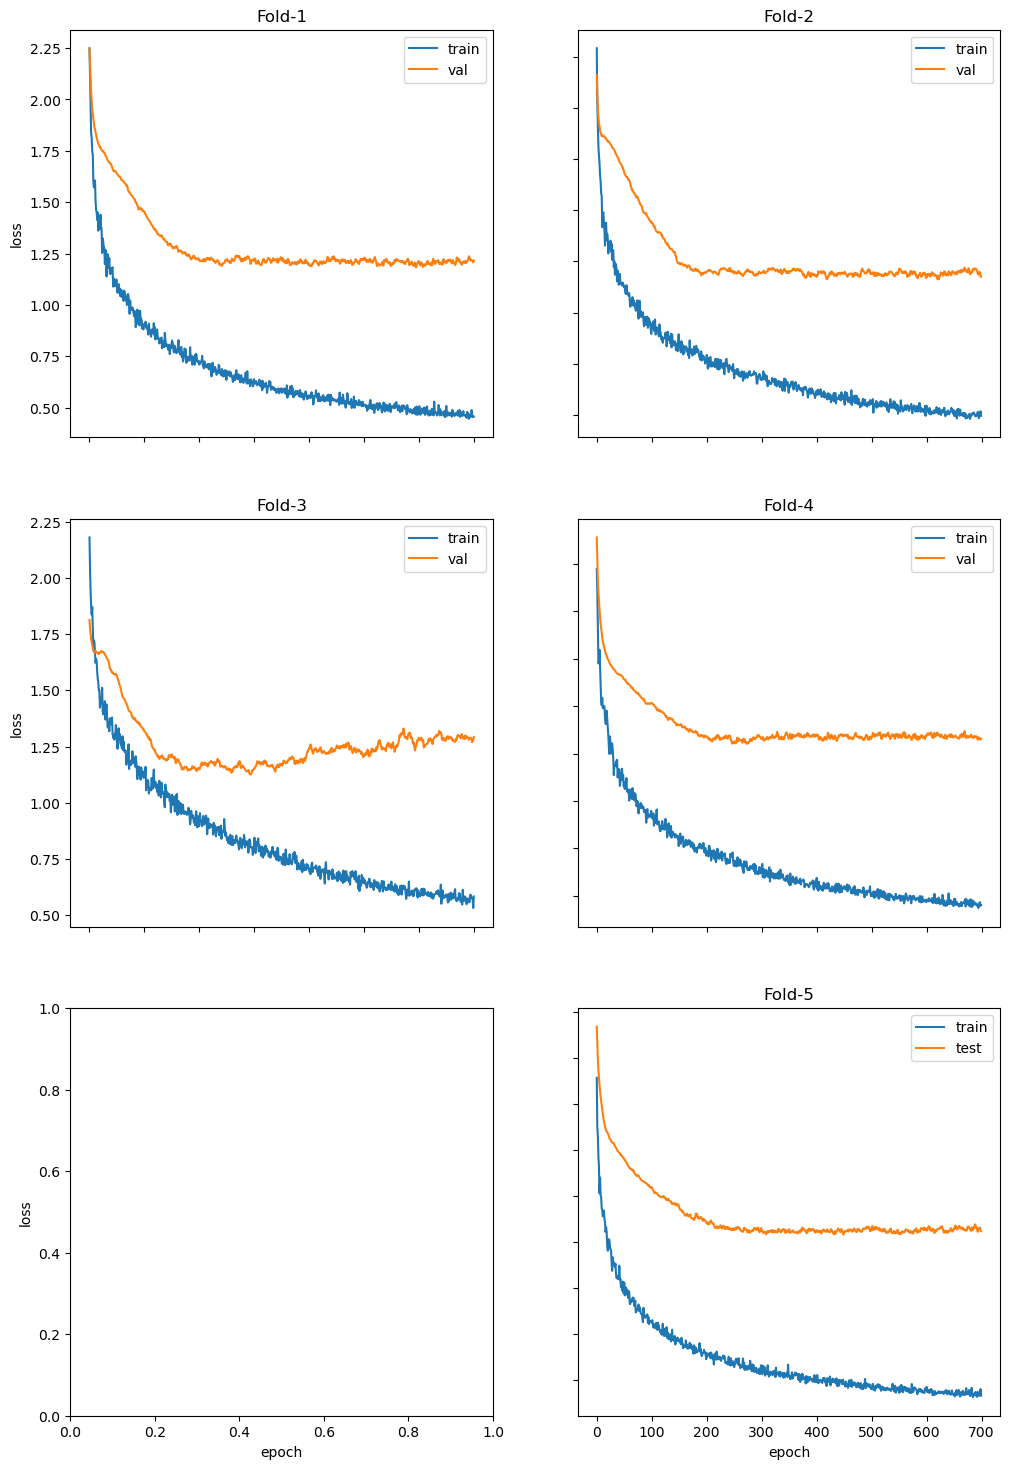

In [32]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(3, 2,figsize=(12,18))
axs[0, 0].plot(hist[0].history['loss'])
axs[0, 0].plot(hist[0].history['val_loss'])
axs[0, 0].set_title('Fold-1')
axs[0, 0].legend(['train', 'val'], loc='upper right')

axs[0, 1].plot(hist[1].history['loss'])
axs[0, 1].plot(hist[1].history['val_loss'])
axs[0, 1].set_title('Fold-2')
axs[0, 1].legend(['train', 'val'], loc='upper right')

axs[1, 0].plot(hist[2].history['loss'])
axs[1, 0].plot(hist[2].history['val_loss'])
axs[1, 0].set_title('Fold-3')
axs[1, 0].legend(['train', 'val'], loc='upper right')

axs[1, 1].plot(hist[3].history['loss'])
axs[1, 1].plot(hist[3].history['val_loss'])
axs[1, 1].set_title('Fold-4')
axs[1, 1].legend(['train', 'val'], loc='upper right')

axs[2, 1].plot(hist[4].history['loss'])
axs[2, 1].plot(hist[4].history['val_loss'])
axs[2, 1].set_title('Fold-5')
axs[2, 1].legend(['train', 'test'], loc='upper right')

for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='loss')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
fig.savefig('emodbFemale_4Folds_65.png')

In [47]:
# loading json and creating model
from keras.models import model_from_json
savedir='ravdess_speaker_male_v2'
m='Model_3'

json_file = open(savedir+m+'.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(savedir + '/' + m + '.h5')
print("Loaded model from disk")

Loaded model from disk


In [48]:
import numpy as np
import tensorflow as tf
import keras
opt = keras.optimizers.RMSprop(learning_rate=0.00001, decay=1e-6)

Xloaded=np.load(savedir+'/X3.npy')
yloaded=np.load(savedir+'/y3.npy')
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(Xloaded, yloaded, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 56.67%


Fold 0: 36.67%

Fold 1: 53.33%

Fold 2: 40.00%

Fold 3: 56.67%

Fold 4: 48.33%

In [49]:
import pandas as pd
from sklearn.metrics import confusion_matrix

y_pred = loaded_model.predict(Xloaded)
print(y_pred.shape)
yy = []
ya = []
for j in y_pred:
    yy.append(np.argmax(j))
print(len(yy))

##önemli
for j in yloaded:
    ya.append(np.argmax(j))

cm=confusion_matrix(ya, yy)
cm

2/2 [==============================] - 0s 17ms/step
(60, 8)
60


array([[4, 0, 0, 0, 0, 0, 0, 0],
       [2, 3, 2, 0, 0, 1, 0, 0],
       [0, 0, 7, 0, 0, 0, 0, 1],
       [1, 1, 0, 4, 0, 0, 1, 1],
       [0, 0, 2, 0, 4, 0, 2, 0],
       [0, 0, 2, 2, 0, 4, 0, 0],
       [0, 0, 1, 0, 0, 2, 3, 2],
       [0, 0, 0, 0, 0, 1, 2, 5]], dtype=int64)

In [52]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = np.array(confusion_matrix(ya, yy) , dtype=float)
for it in range(0, 8):
    sumik = np.sum(array[it])
    for it2 in range(0, 8):
        array[it][it2] = round(array[it][it2] * (100.0/sumik) ,1)
print(array)

[[100.    0.    0.    0.    0.    0.    0.    0. ]
 [ 25.   37.5  25.    0.    0.   12.5   0.    0. ]
 [  0.    0.   87.5   0.    0.    0.    0.   12.5]
 [ 12.5  12.5   0.   50.    0.    0.   12.5  12.5]
 [  0.    0.   25.    0.   50.    0.   25.    0. ]
 [  0.    0.   25.   25.    0.   50.    0.    0. ]
 [  0.    0.   12.5   0.    0.   25.   37.5  25. ]
 [  0.    0.    0.    0.    0.   12.5  25.   62.5]]


           angry  calm  disgust  fearful  happy  neutral   sad  surprised
angry      100.0   0.0      0.0      0.0    0.0      0.0   0.0        0.0
calm        25.0  37.5     25.0      0.0    0.0     12.5   0.0        0.0
disgust      0.0   0.0     87.5      0.0    0.0      0.0   0.0       12.5
fearful     12.5  12.5      0.0     50.0    0.0      0.0  12.5       12.5
happy        0.0   0.0     25.0      0.0   50.0      0.0  25.0        0.0
neutral      0.0   0.0     25.0     25.0    0.0     50.0   0.0        0.0
sad          0.0   0.0     12.5      0.0    0.0     25.0  37.5       25.0
surprised    0.0   0.0      0.0      0.0    0.0     12.5  25.0       62.5



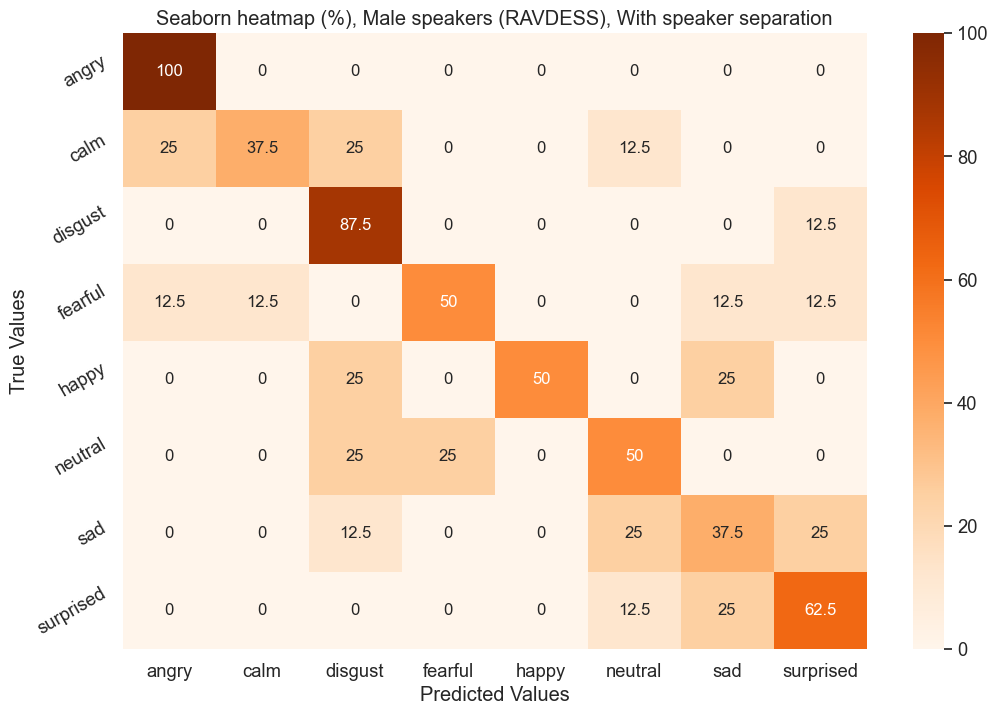

In [53]:
listik = ['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

df_cm1 = pd.DataFrame(array, index = [i for i in listik],
                  columns = [i for i in listik])
print(df_cm1)
print()
plt.figure(figsize = (12,8))
plt.title('Seaborn heatmap (%), Male speakers (RAVDESS), With speaker separation')
sn.set(font_scale=1.2)
aa=sn.heatmap(df_cm1, annot=True, cmap="Oranges", fmt='g', annot_kws={"size": 12})
aa.set_yticklabels(df_cm1,rotation=30)
aa.set_ylabel('True Values')
aa.set_xlabel('Predicted Values')
plt.savefig('EmodbFemale_65.png')
plt.show()